In pattern recognition k-nearest neighbors (K-NN) is a <font color = 'red'>non-parametric</font> model used for classification and regression.
In both cases input consists of the k-closest training examples in the feature space. The output depends on whether 
K-NN used for classification or regression.


. In K-NN classification, the O/P is a class membership. Let say we have 2 class red and blue. Our task is to classify a unknown "object". Let say our k=3, means we have to consider 3 nearest point and make a decision. 
Find the "Euclidean distance" of our "unknown object" and test points 
Take the closest 3 test points.
If we find 2 red test points is close to "unknown object", then "unknown object" belongs to red classification.

. In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

# sklearn Neighbors
Main documentation http://scikit-learn.org/stable/modules/neighbors.html#classification

sklearn.neighbors provides functionality for <font color='green'>unsupervised</font>  and <font color='green'>supervised </font> neighbors-based learning methods.

## Nearest Neighbors Classification
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: <br> <font color='green'>KNeighborsClassifier</font>  implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. <br> <font color='green'>RadiusNeighborsClassifier </font> implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

sklearn classification
=================
Main Documentation
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<font color='green'>sklearn.neighbors.KNeighborsClassifier</font> (n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)



In [2]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

<font color='green'>fit(X, y)</font>	Fit the model using X as training data and y as target values

<font color='green'>predict(X)</font> Predict the class labels for the provided data

<font color='green'>predict_proba(X)</font> Return probability estimates for the test data X.

In [3]:
print(neigh.predict([[1.1]]))


[0]


In [4]:
print(neigh.predict_proba([[0.9]]))

[[0.66666667 0.33333333]]


Automatically created module for IPython interactive environment


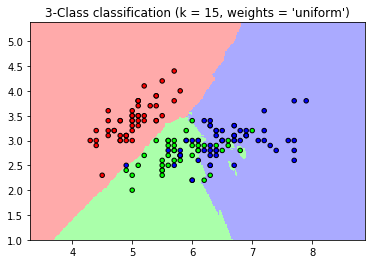

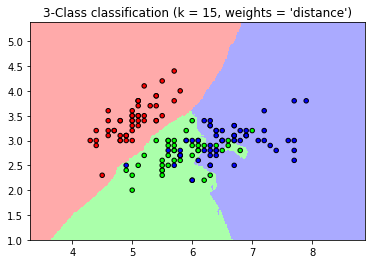

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

sklearn Unsupervised
==================
NearestNeighbors implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.

In the following example, we construct a NeighborsClassifier class from an array representing our data set and ask who’s the closest point to [1,1,1]

In [5]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [9]:
X = [[1., 1., 1.]]
neigh.kneighbors(X)

(array([[0.5]]), array([[2]]))

<font color='green'>kneighbors(X, y)</font>	([X, n_neighbors, return_distance])	Finds the K-neighbors of a point.

As you can see, it returns [[0.5]], and [[2]], which means that the element is at distance 0.5 and is the closest to the third element of samples. 

In [7]:
# You can also query for multiple points:

X = [[0., 1., 0.], [1., 0., 1.]]
neigh.kneighbors(X, return_distance=False) 


array([[1],
       [2]])

We can see that [0,1,0] is close to sample 1 and [1,0,1] close to sample 2